In [1]:
%config IPCompleter.greedy = True

In [2]:
import random
import gym
import numpy as np
import time
from gym.envs.registration import register
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
register(
        id='FrozenLakeNoSlip-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery':False},
        max_episode_steps=100,
        reward_threshold=0.78, # optimum = .8196
        ) 

env_name = "FrozenLakeNoSlip-v0"    

In [4]:
env = gym.make(env_name)

print("Observation space ->", env.observation_space)
print("Action space -> ", env.action_space)
print("Type of action ->", type(env.action_space))

Observation space -> Discrete(16)
Action space ->  Discrete(4)
Type of action -> <class 'gym.spaces.discrete.Discrete'>


In [8]:
class Agent:
    '''
    1. Model이 discrete한지 continuous한지 판단하고, state_size를 저장한다.
    2. discrete일 경우, action_size를 저장. 
    3. continuous일 경우, action의 boundary와 shape을 저장.
    '''
    def __init__(self, env):
        self.is_discrete = \
            type(env.action_space) == gym.spaces.discrete.Discrete
        
        # state_size == state의 갯수 
        self.state_size = env.observation_space.n
        print("State size:", self.state_size)
        
        if self.is_discrete:
            # action_size == action의 갯수 
            self.action_size = env.action_space.n
            print("Environment is Discrete and Action size is", self.action_size)
  
        else:
            print("Environment is Continuous")
            
            # action의 boundary와 action의 shape
            self.action_low = env.action_space.low 
            self.action_high = env.action_space.high
            self.action_shape = env.action_space.shape
            print("self.action_low ->", self.action_low)
            print("self.action_high ->", self.action_high)
            print("self.action_shape ->", self.action_shape)

    def get_action(self, state):
        '''
        Returns a randomly selected action
        '''
        if self.is_discrete:
            action = random.choice(range(self.action_size))
        else:
            action = np.random.uniform(self.action_low,
                                       self.action_high,
                                       self.action_shape)
            
        return action

In [9]:
class SARSA_Agent(Agent):
    def __init__(self, env, discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)
        
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.build_model()
        
        print("discount_rate:", discount_rate)
        print("learning_rate:", learning_rate)
        
    def build_model(self):
        self.SARSA_table = 1e-4*np.random.random([self.state_size, self.action_size])
        
    def get_action(self, state):
        SARSA_current = self.SARSA_table[state]
        action_greedy = np.argmax(SARSA_current)
        action_random = super().get_action(state)
        
        # Decaying epsilon algorithm. Decay a chance of having the random action for every episode.
        if random.random() < self.eps:
            return action_random 
        else:
            return action_greedy
    
    def train(self, experience):
        state, action, reward, next_state, next_action, done = experience
        
        SARSA_next = self.SARSA_table[next_state]
        
        if done:
            SARSA_next = np.zeros([self.action_size])

        self.SARSA_table[state, action] = (1 - self.learning_rate) * self.SARSA_table[state, action] + \
        self.learning_rate * (reward + self.discount_rate * self.SARSA_table[next_state, next_action])
        
        if done:
            # decay epsilon. 
            self.eps = self.eps * 0.99 

In [11]:
# Generate an agent that follows SARSA-Learning algorithm.
SARSA_agent = SARSA_Agent(env)
total_reward = 0
total_reward_list = list()
episodes = 1000

for episode in range(episodes):
    
    total_reward_list.append(total_reward)
    state = env.reset() # reset the environment when the episode terminates
    
    print(f"Entering Episode {episode}")
    print(f"Total Reward is {total_reward}")

    
    done = False                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    
    SARSA_action = SARSA_agent.get_action(state)
    
    while not done:
        
        next_state, reward, done, info = env.step(SARSA_action)
        
        SARSA_next_action = SARSA_agent.get_action(next_state)
        
        experience = (state, SARSA_action, reward, next_state, SARSA_next_action, done)
        print(f"S:{state} -> A:{SARSA_action} -> R:{reward} -> S:{next_state} -> A:{SARSA_next_action}. Done? {done}")

        SARSA_agent.train(experience)
        
        state = next_state  
        
        SARSA_action = SARSA_next_action
        
        total_reward = total_reward + reward
        
        print(f"Episode: {episode}, Total reward: {total_reward}, eps: {SARSA_agent.eps}")
        print("---------------------------------------------------------------------")
        print(f"\n", SARSA_agent.SARSA_table)
        print("---------------------------------------------------------------------")
        
        env.render()
        clear_output(wait=True)

S:4 -> A:2 -> R:0.0 -> S:5 -> A:1. Done? True
Episode: 999, Total reward: 1.0, eps: 4.317124741065784e-05
---------------------------------------------------------------------

 [[3.38360534e-05 8.30869228e-05 5.42423574e-05 5.35275417e-05]
 [6.01651570e-05 8.48511000e-05 4.97980582e-05 3.30646405e-05]
 [4.67806914e-05 8.87770962e-05 9.49232361e-05 2.04538694e-05]
 [3.87361177e-05 8.75817840e-05 9.23357343e-06 7.39062307e-05]
 [6.76891113e-05 4.80277301e-05 8.56968715e-05 5.54055802e-05]
 [7.49243411e-05 8.83524958e-05 7.58798986e-05 8.75263147e-05]
 [1.39343884e-05 9.78574226e-05 9.78720719e-05 3.98693272e-05]
 [6.37008651e-07 8.21851461e-05 5.52430944e-06 4.91683366e-05]
 [3.15330834e-05 2.19550031e-05 7.55579675e-05 8.88586470e-05]
 [6.29546956e-06 3.31103467e-05 3.79185569e-05 3.84808772e-05]
 [5.62143661e-05 6.88292088e-05 8.95926630e-05 1.42459013e-05]
 [9.96037331e-05 2.48847373e-05 4.25606857e-05 7.60961559e-05]
 [4.47018333e-05 4.16870619e-05 8.72985549e-06 6.94484910e-05]
 [4

In [12]:
def analysis_tool(episode_length, total_reward):
    fig, ax = plt.subplots()
    x = np.linspace(0,episode_length, num= episode_length)
    y = total_reward
    
    ax.plot(x,y)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Total Reward')
    
    ax.set_ylim(0, episode_length)
    ax.set_title('Accumulated Total Rewards')
    ax.grid()

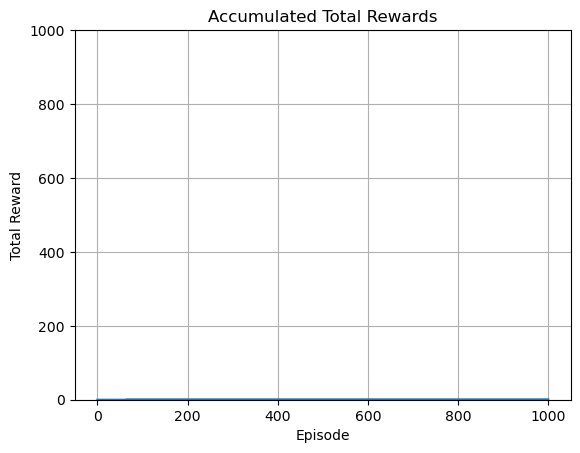

In [13]:
analysis_tool(episodes, total_reward_list)